<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 1.3: Metabolomics of athlete performance at high altitude: Feature Plot

<p style="text-align: justify">
<br>
This tutorial covers the necessary steps for producing different feature plots using data from a study on the impact that high altitude has on the performanance of athletes.
</p>

<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red', size=4>Disclaimer: It is assumed that any data used with this workflow has been cleaned and any missing values either removed or imputed, as this workflow does not perform data cleaning or missing value removal/imputation. 
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    
<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), Seaborn (<a href="https://seaborn.pydata.org/">seaborn.pydata.org</a>, statsmodels (<a href="www.statsmodels.org/">statsmodels.org</a>), Scikit-learn (<a href="scikit-learn.org/">scikit-learn.org</a>), scikits.bootstrap (<a href="github.com/cgevans/scikits-bootstrap">github.com/cgevans/scikits-bootstrap</a>) and Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os

home = os.getcwd() + "/"

import numpy as np
import pandas as pd
import multivis

print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak Table</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> tables from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br>

This dataset has previously been published in (<a href="https://physoc.onlinelibrary.wiley.com/doi/full/10.1113/EP087159">Lawler et al. (2018)</a>) in <i>Experimental Physiolgy</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>

Please inspect the <a href="Altitude_Data.xlsx">Altitude_Data.xlsx </a>Excel file before using it in this tutorial to understand its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'Altitude_Data.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="Altitude_Data.xlsx">Altitude_Data.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'Altitude_Data.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading table: Peak
Loading table: Data
TOTAL SAMPLES: 29 TOTAL PEAKS: 32
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table

Check the Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>
</div>

In [3]:
display(DataTable)

,Idx,Class,SampleID,M1,M2,M3,M4,M5,M6,M7,...,M23,M24,M25,M26,M27,M28,M29,M30,M31,M32
1,1,Day1,ID#8,11869.885789,7928.191086,10435.615600,24274.490844,1.652528e+06,5.527597e+05,3302.626974,...,8821.868440,45452.021662,8.422674e+05,35812.954717,11908.058199,58304.192636,76229.516925,698.829269,6.152166e+06,3.011384e+05
2,2,Day3,ID#9,6091.032382,336302.294432,7583.153313,15992.455361,1.014382e+06,5.398275e+05,2561.396590,...,7070.409466,23748.717737,5.969310e+05,43209.005653,1614.750726,17107.605509,33792.399242,5219.808748,3.844697e+06,3.876507e+05
3,3,Day14,ID#10,8304.840762,91992.628406,15463.843074,17243.287685,1.261087e+06,6.358351e+05,2579.520637,...,6189.891266,62171.092488,4.617908e+05,19891.976258,5787.252806,21196.689803,49518.409732,6917.767103,3.642466e+06,3.085592e+06
4,4,Day1,ID#4,5679.245738,103604.360972,11726.584477,18997.946320,1.730119e+06,8.018186e+05,1862.338814,...,14710.768208,29470.036797,6.338633e+05,54690.964915,6119.355667,34562.628959,25722.056666,82857.001884,6.507678e+06,4.544997e+05
5,5,Day3,ID#3,7927.719880,377994.409342,37252.855940,23070.362098,2.172443e+06,8.122617e+05,2368.612424,...,8373.694858,70177.184112,5.764836e+05,119391.571698,5831.690401,11314.289830,27222.497589,8780.422655,5.452713e+06,3.675841e+05
6,6,Day14,ID#3,4074.580486,9234.118904,2883.602638,27252.577493,1.694014e+06,3.198403e+05,2436.745786,...,17175.921137,43648.210575,3.669026e+05,41311.727090,20909.038093,14625.381528,61184.204465,2386.211484,3.958768e+06,7.036890e+05
7,7,Day3,ID#2,7120.333141,98285.350473,14214.077514,24997.653286,1.421475e+06,6.981114e+05,3576.187472,...,11930.411039,33482.365703,7.695907e+05,17285.765486,4002.855161,18389.688133,54971.306524,1266.178495,4.396494e+06,5.522302e+05
8,8,Day3,ID#4,8103.250066,31683.902081,8928.894882,20545.072813,1.655281e+06,3.886826e+05,3023.746753,...,9760.323565,24682.407167,6.951134e+05,33854.620792,5749.788807,13098.908274,32455.790304,13672.154888,3.771656e+06,1.186001e+06
9,9,Day14,ID#8,8273.693156,382598.960254,4154.972730,22212.782829,1.891639e+06,8.915732e+05,2310.807344,...,11142.048186,50927.179351,6.828179e+05,169428.675064,5179.873860,14255.030832,63933.849462,2019.496191,3.703559e+06,4.964483e+05
10,10,Day3,ID#10,6690.535074,98946.804580,5388.740427,14757.880513,1.370226e+06,6.644797e+05,2577.400534,...,10905.284099,30077.046114,6.620947e+05,44494.246759,5019.971982,9310.215496,32246.148489,455.958833,3.207303e+06,3.559986e+05


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table

Check the Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

In [4]:
display(PeakTable)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,Dratio
1,1,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,2.887221
2,2,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,24.314863
3,3,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,3.216742
4,4,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,4.025602
5,5,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,2.417115
6,6,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,2.332534
7,7,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,1.564374
8,8,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,7.463177
9,9,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,3.480650
10,10,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,4.942172


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Statistical analysis

Statistical analysis is important to identify any features or samples which may be outliers. 
It is also important to identify whether the data is normally distributed prior to any further analysis such as which scaling methods to use or the type of correlation analysis to use. Whether the data is normally distrubuted or not can determine the most suitable correlation function to use. For example the parametric method Pearson's correlation should be used for normally distributed data, whereas the non-parametric method Spearman's correlation is suitable for non-normally distributed data.

Statistical analysis can also provide additional univariate information for futher down-stream visualisations, such as one-way Anova p-values and PCA loadings to be displayed along with each feature.
</div>

In [5]:
stats = multivis.utils.statistics(PeakTable, DataTable)

stats.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), 'robust' (centers to the median and scales to between 25th and 75th quantile range) (default: (True, 'standard'))
        

In [6]:
params = dict({'parametric': True
              , 'log_data': (True, 2)
              , 'scale_data': (False, 'standard')
              , 'impute_data': (False, 3)
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Day1'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': False
              , 'group_missing': False
              , 'pca_loadings': False
              , 'normality_test': True
              , 'group_normality_test': False
              , 'group_mean_CI': False
              , 'group_median_CI': False
              , 'mean_fold_change': False
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': False
              , 'mann_whitney_u_test': False})

stats.set_params(**params)

PeakTableStats = stats.calculate()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table with statistical information: Shapiro-Wilk's pvalue

Check the imported Peak table with statistical information by simply calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableStats)</span><br>
</div>

In [7]:
display(PeakTableStats)

,Idx,Name,Label,Mode,mz,rt,F,pvalue,pFDR,RSD,Dratio,Shapiro_statistic,Shapiro_pvalue
0,0,M1,Ocatanedioic acid,Negative,173.081494,528.5930,1.205805,0.316809,0.290529,10.471229,2.887221,0.964668,4.256961e-01
1,1,M2,Glycoursodeoxycholic acid,Negative,448.304880,1158.7500,6.674117,0.007382,0.079750,4.706839,24.314863,0.880608,3.469511e-03
2,2,M3,Dodecanedioc acid,Negative,229.143848,966.4710,3.659888,0.079039,0.191246,19.856452,3.216742,0.962037,3.686128e-01
3,3,M4,Succinic Acid,Negative,117.019323,133.4985,0.415028,0.626102,0.341498,5.577582,4.025602,0.912227,1.946368e-02
4,4,M5,Citric Acid,Negative,191.019367,109.5440,0.741641,0.435266,0.311669,9.170874,2.417115,0.653896,4.894212e-07
5,5,M6,Lactic Acid,Negative,89.025122,84.3630,4.928634,0.020552,0.111017,10.341807,2.332534,0.983205,9.110416e-01
6,6,M7,5-Hydroxytryptophan,Negative,219.076809,217.4930,1.254299,0.303983,0.286883,16.876721,1.564374,0.971145,5.911373e-01
7,7,M8,Glycocholic acid,Negative,464.299632,979.1600,7.626280,0.005556,0.076033,11.902311,7.463177,0.986695,9.662158e-01
8,8,M9,L-Tryptophan,Negative,203.082155,337.8890,1.335823,0.287394,0.284528,4.289423,3.480650,0.961391,3.555591e-01
9,9,M10,Hexadecanedioic acid,Negative,285.205730,1344.6100,0.554782,0.543473,0.328267,9.537188,4.942172,0.952579,2.134400e-01


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Determine if the data is normally distributed

If the majority of the data shows a Shapiro-Wilks pvalue > 0.05 the data is normally distributed and parametric statistical analysis is recommended, however if the pvalue is < 0.05 then the data is non-normally distributed and non-parametric analysis methods are recommended.
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features normally distributed

In [8]:
display(len(PeakTableStats.query('Shapiro_pvalue > 0.05')))

24

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features non-normally distributed

In [9]:
display(len(PeakTableStats.query('Shapiro_pvalue < 0.05')))

8

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Normality conclusion

The data is normally distributed and therefore parametric analysis (e.g. one-way Anova, T-test, Pearson's correlation etc) is recommended.

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Plot Features

Feature plots provide a means to compare trajectories of features and depending on the type of feature plot, the distribution of each feature can be visualised and compared, providing a way to identify any features which may contain outliers or large differences in magnitude (concentration/expression level), between various groups/classes in the data.
    
Note1: If plotting with point plot and the data is normally distributed it is recommended to use a mean estimator.
    
Note2: If the data is normally distributed it is recommended to scale using the 'standard' scaler, which centers around a mean of 0 and scales to a standard deviation of 1, with larger standard deviations having a bigger affect. Alternatively the 'minmax' or 'maxabs' scaler can be used and can perform similarly to each other if the data is positive and both maintains the shape of the distribution, unlike the 'standard' method. The 'robust' method centers around the median and scales to a lower and upper quantile range, and is robust to the presence of outliers. To see how different scaling methods affect the data, swap out 'standard' for: 'minmax', 'maxabs, and 'robust' and see how the plots change.   
</div>

In [10]:
features = multivis.plotFeatures(PeakTable, DataTable)

features.help()

Produces different feature plots given a data table and peak table.

            Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe containing matrix of values to plot (N samples x N features). Columns/features must be same as 'Name' from Peak Table.

            Methods
            -------
            set_params : Set parameters -
                plot_type: The type of plot. Either "point", "violin", "box", "swarm", "violin-swarm" or "box-swarm" (default: 'point')
                column_numbers: The number of columns to display in the plots (default: 4)                
                log_data: Perform a log ('natural', base 2 or base 10) on all data (default: (True, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), '

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Mean Peak Area Point plot
</div>

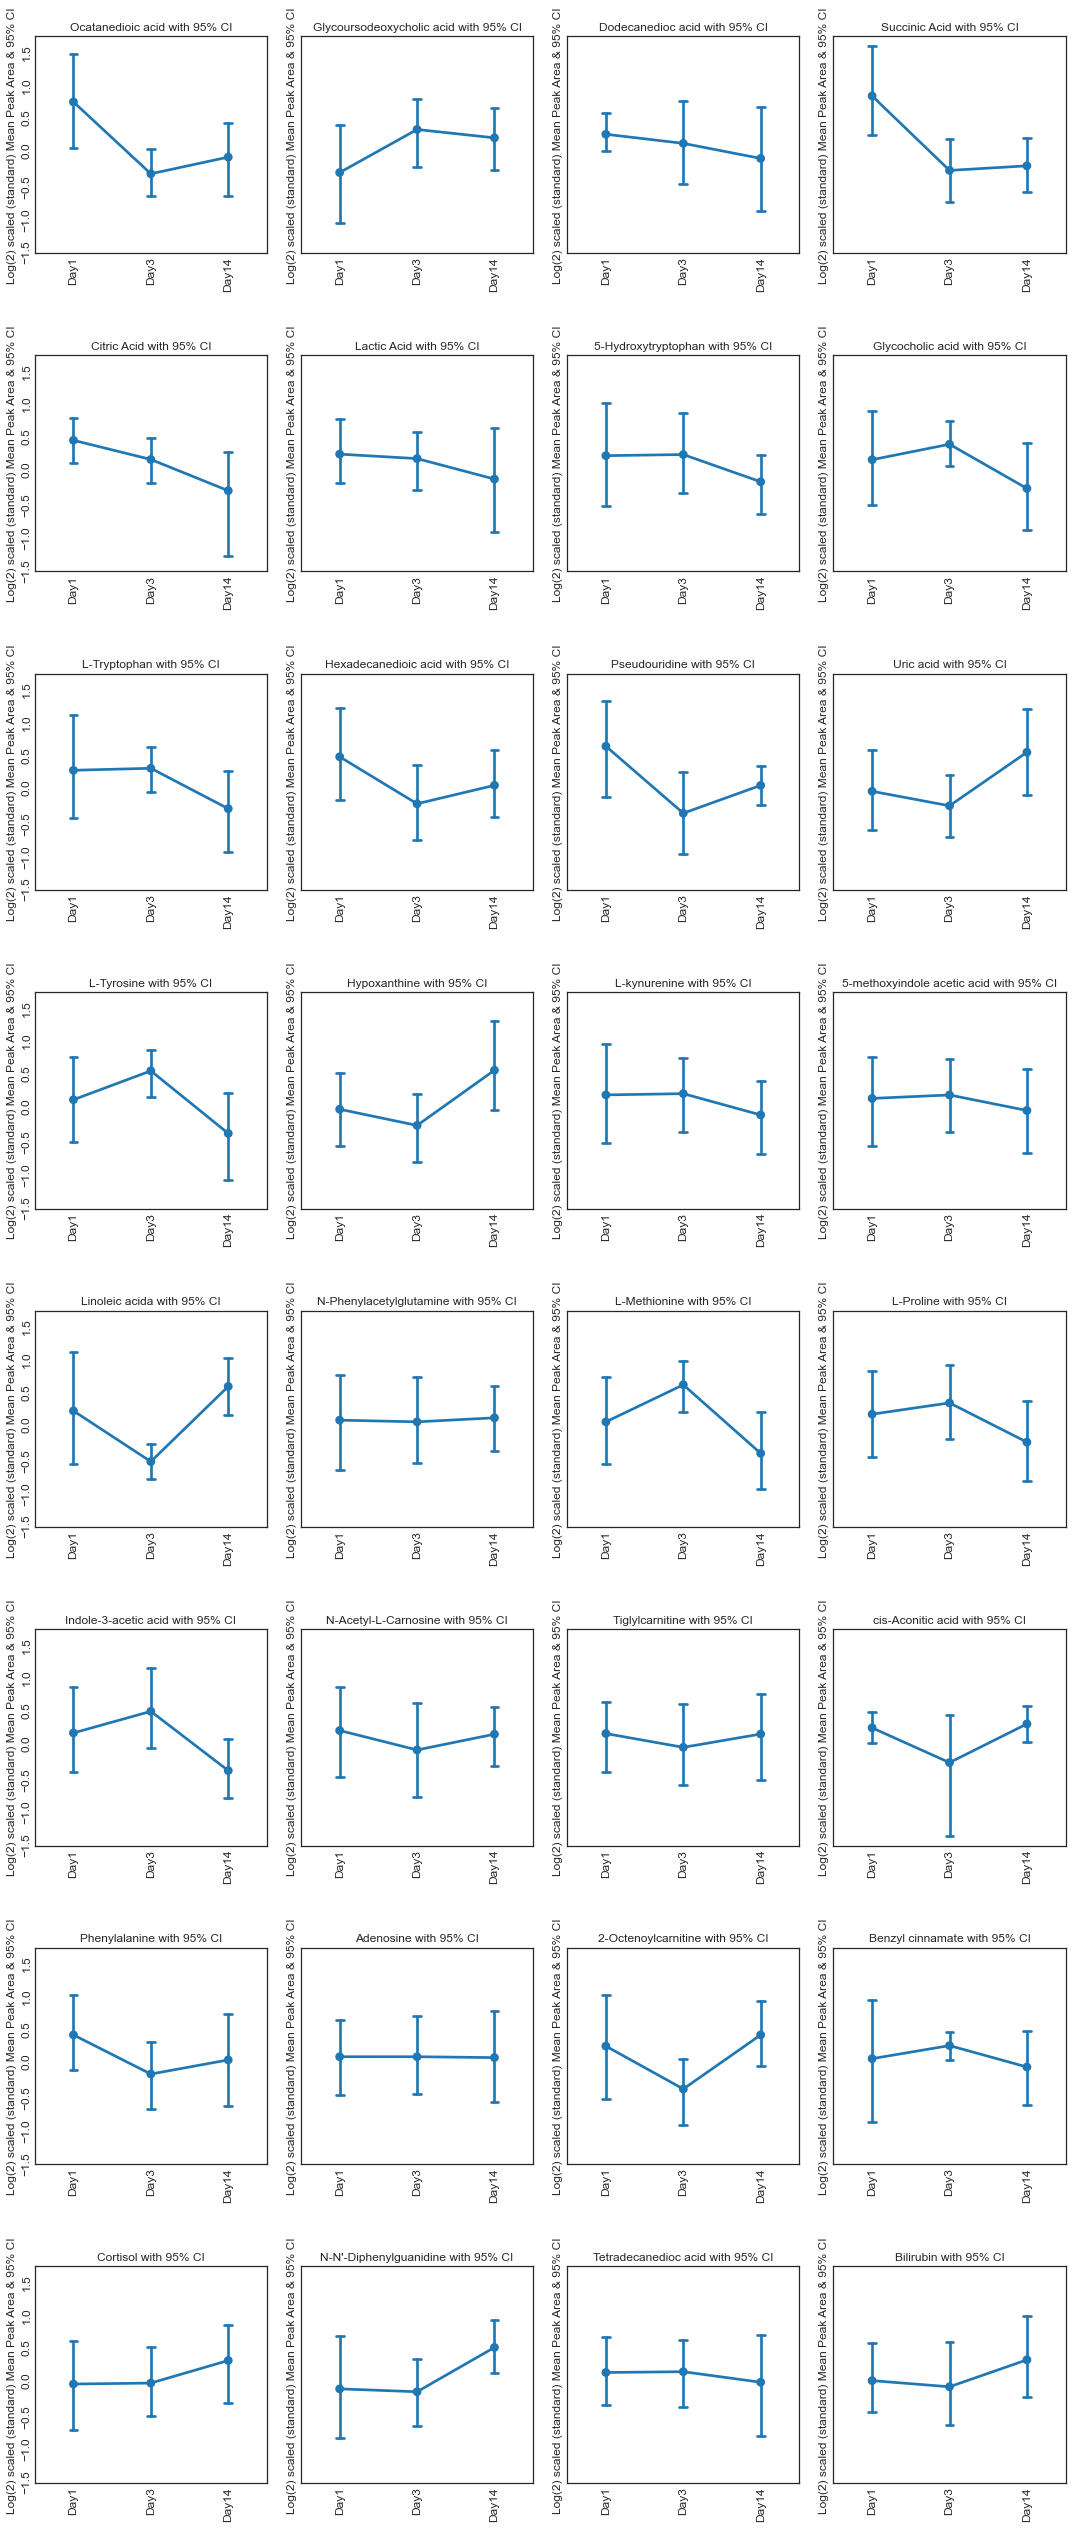

In [11]:
plotting_params = dict({'plot_type': 'point'
               , 'column_numbers': 4
               , 'log_data': (True, 2)
               , 'scale_data': (True, 'standard')
               , 'impute_data': (False, 3)
               , 'style': 'seaborn-white'
               , 'transparent': False
               , 'figSize': (15, 35)
               , 'fontSize': 12
               , 'colour_palette': None
               , 'y_axis_label': None
               , 'x_axis_rotation': 90
               , 'group_column_name': 'Class'
               , 'point_estimator': 'mean'
               , 'point_ci': 95
               , 'violin_distribution_type': 'quartile'
               , 'violin_width_scale': 'width'
               , 'box_iqr': 1.5
               , 'saveImage': True
               , 'imageFileName': '_features_altitude_study.png'
               , 'dpi': 200})

features.set_params(**plotting_params)
features.plot()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Violin plot
</div>

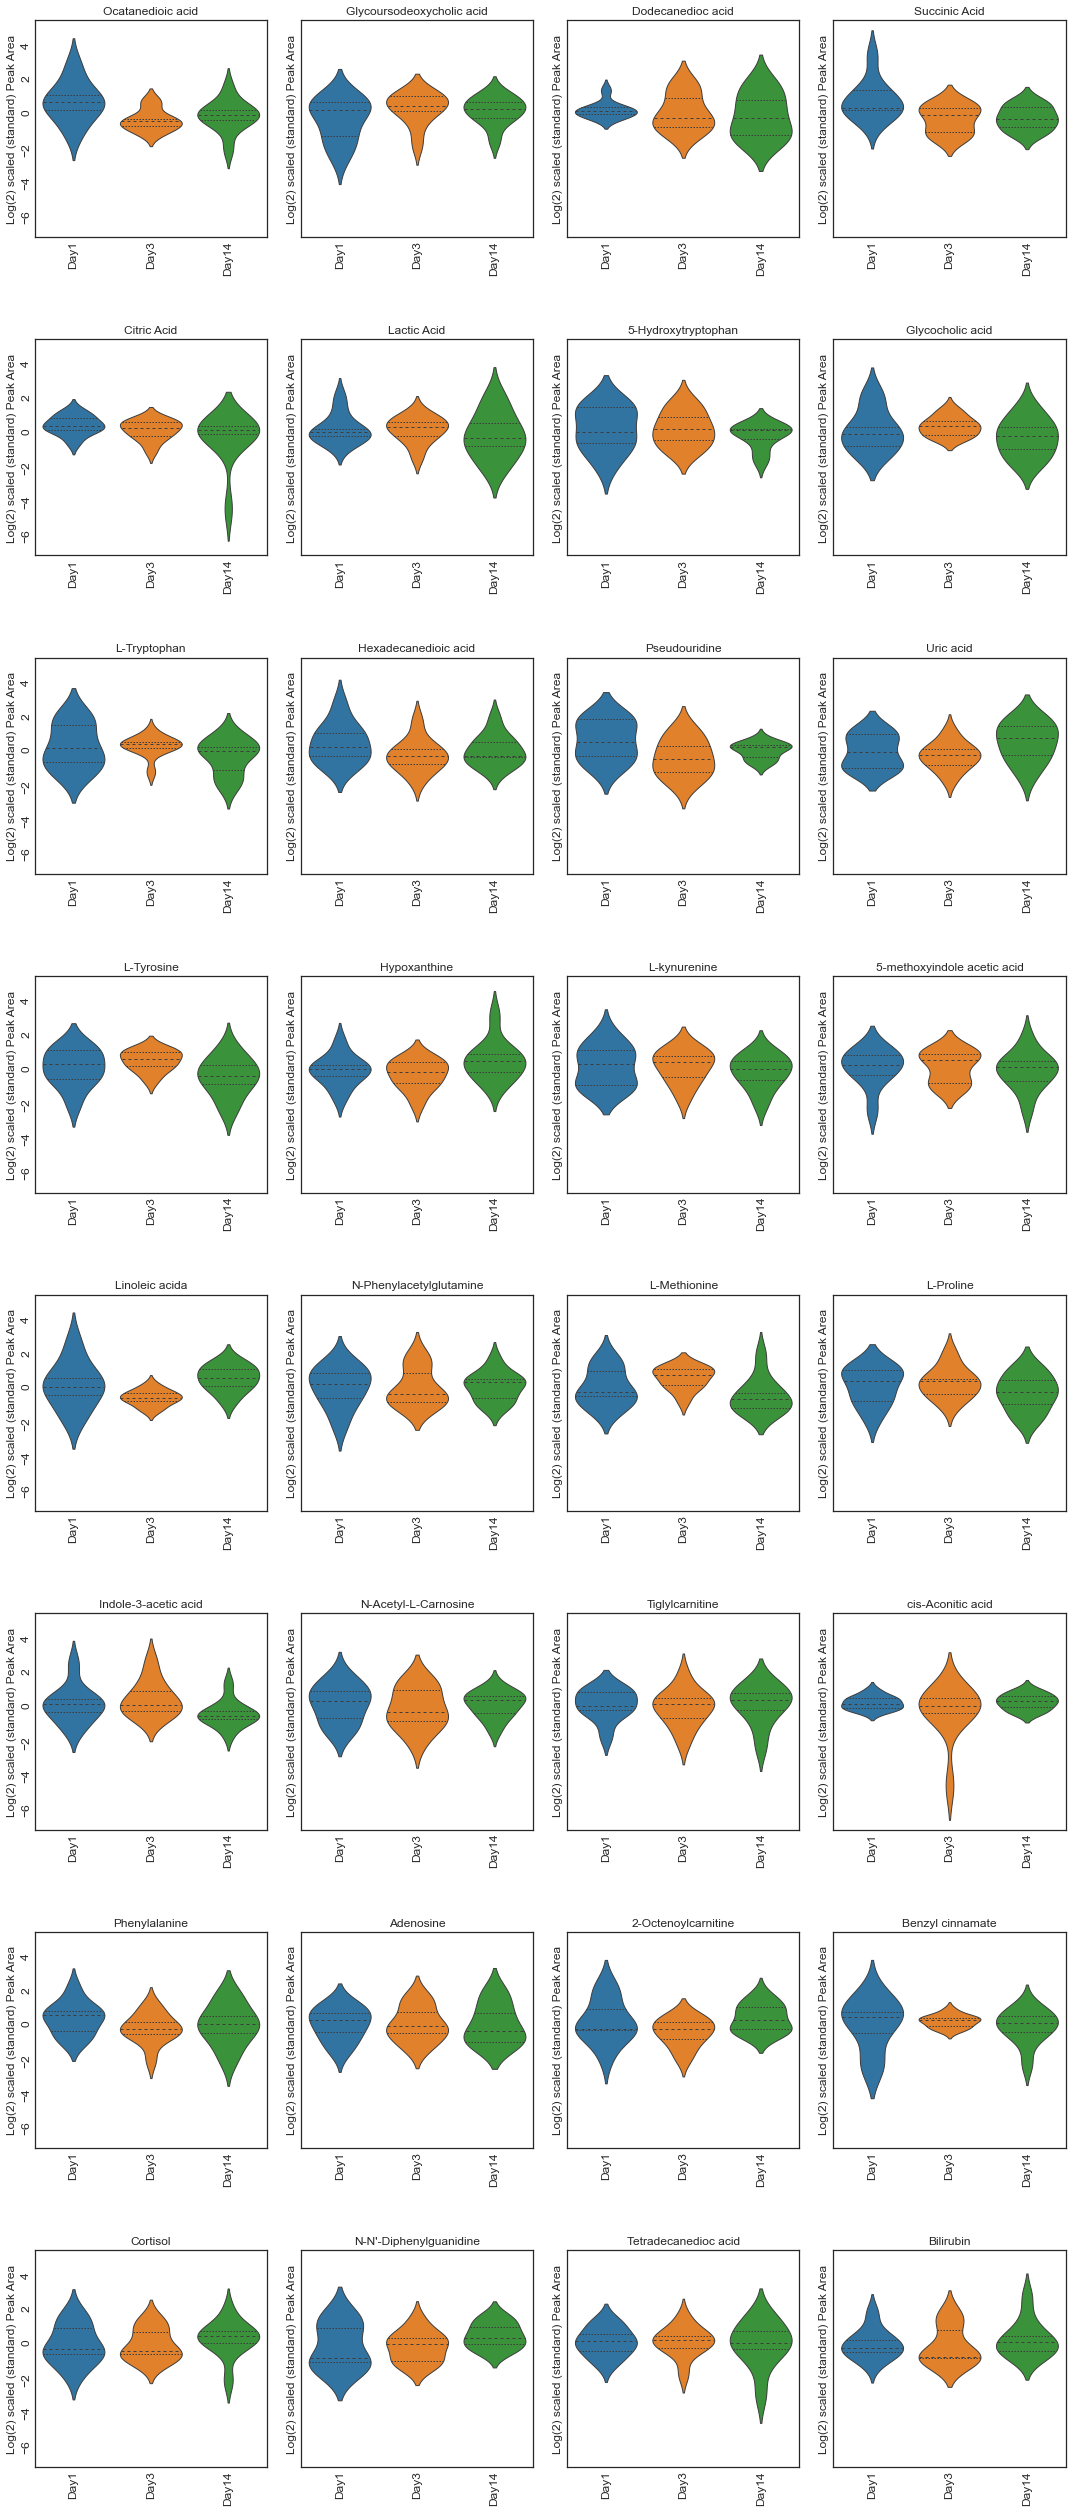

In [12]:
plotting_params['plot_type'] = 'violin'

features.set_params(**plotting_params)
features.plot()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Box plot
</div>

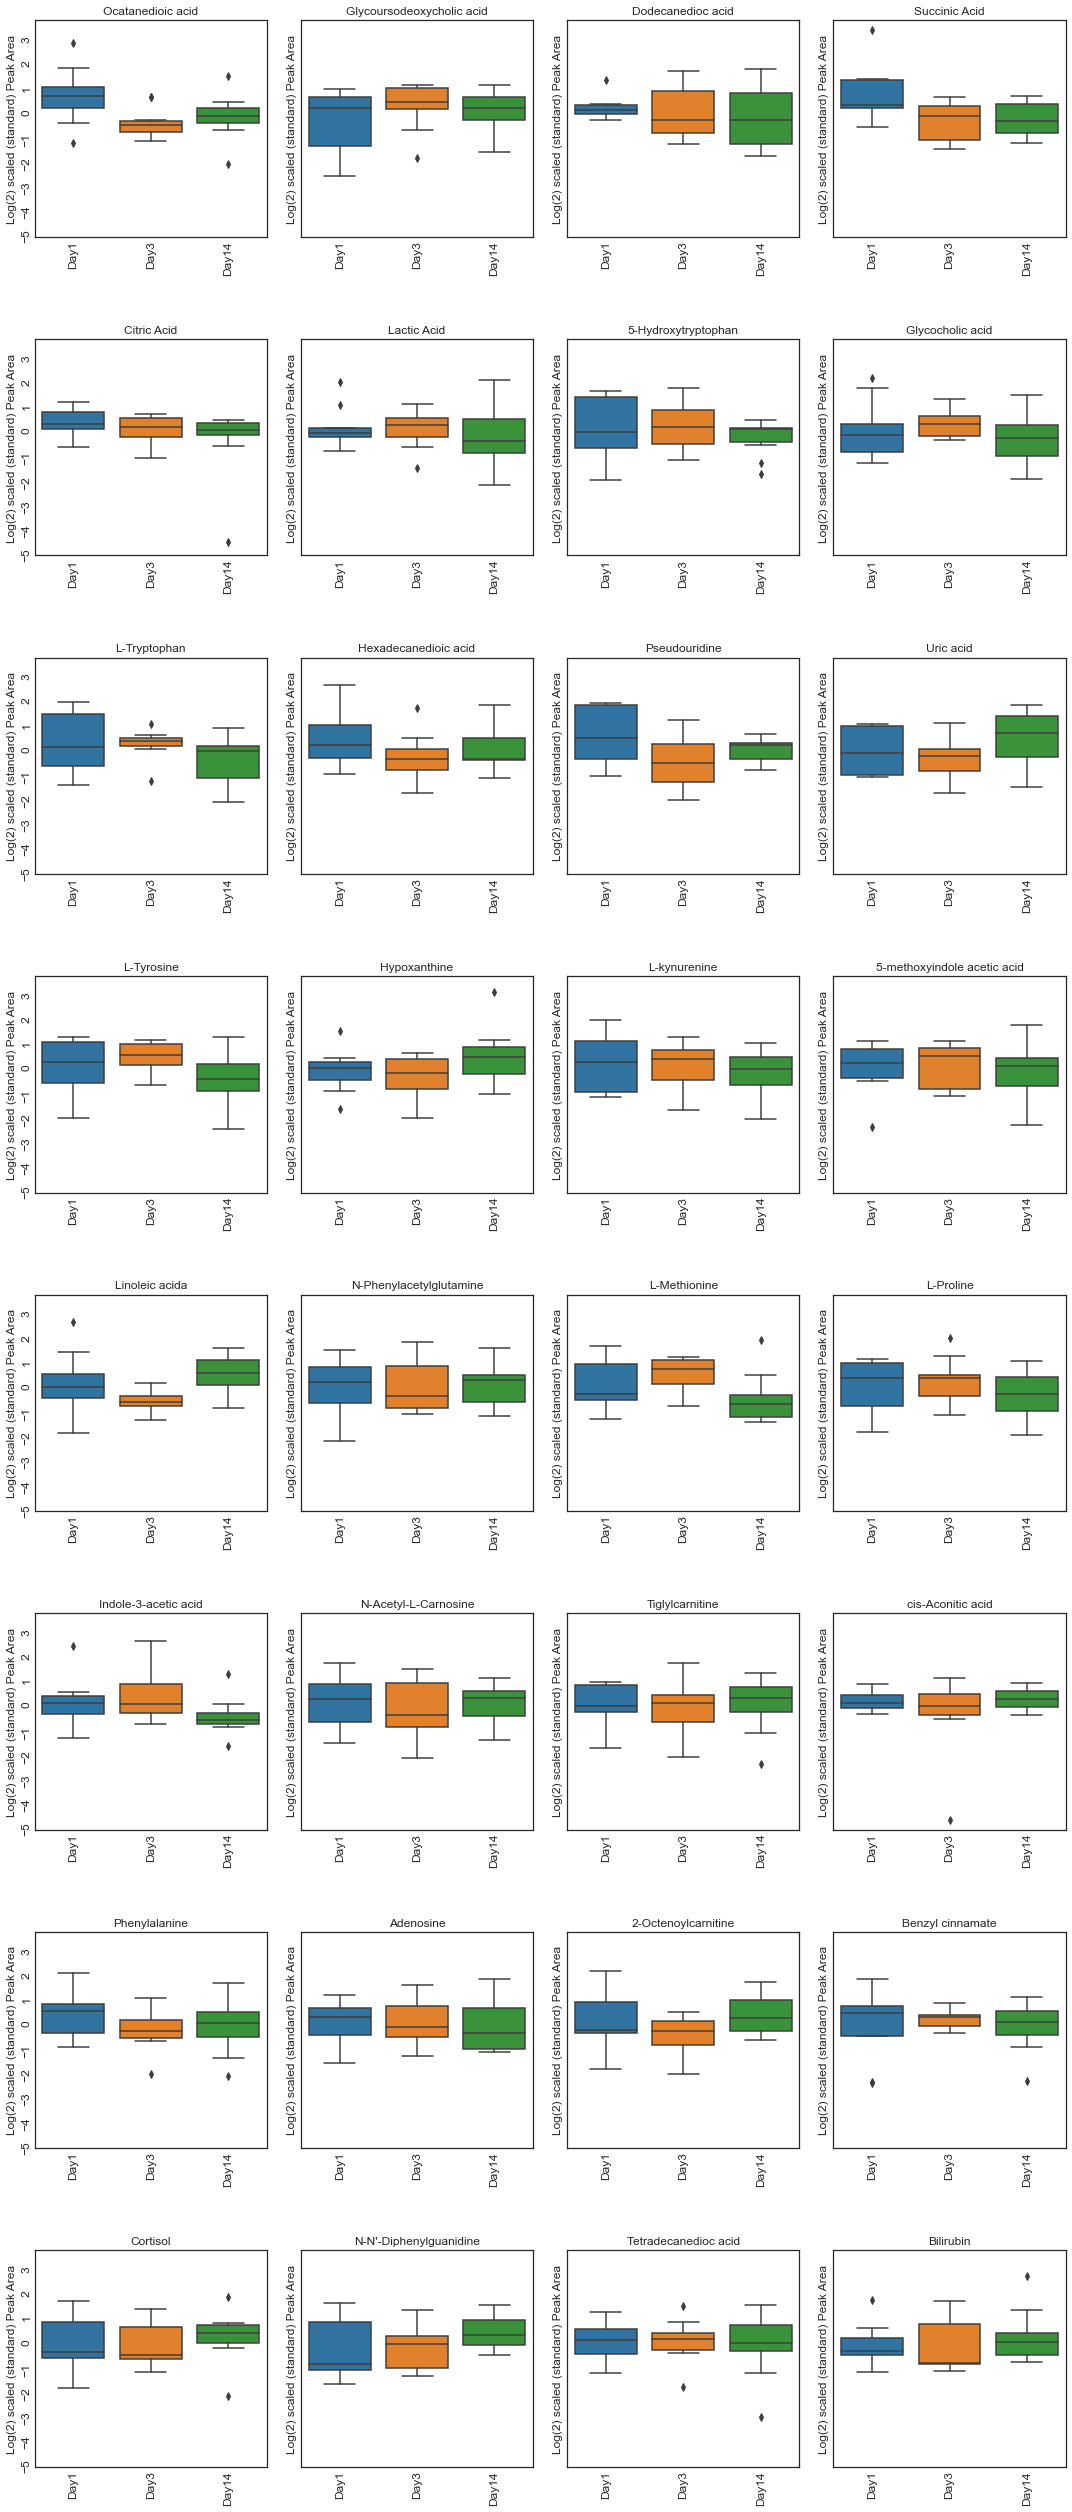

In [13]:
plotting_params['plot_type'] = 'box'

features.set_params(**plotting_params)
features.plot()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Swarm plot
</div>

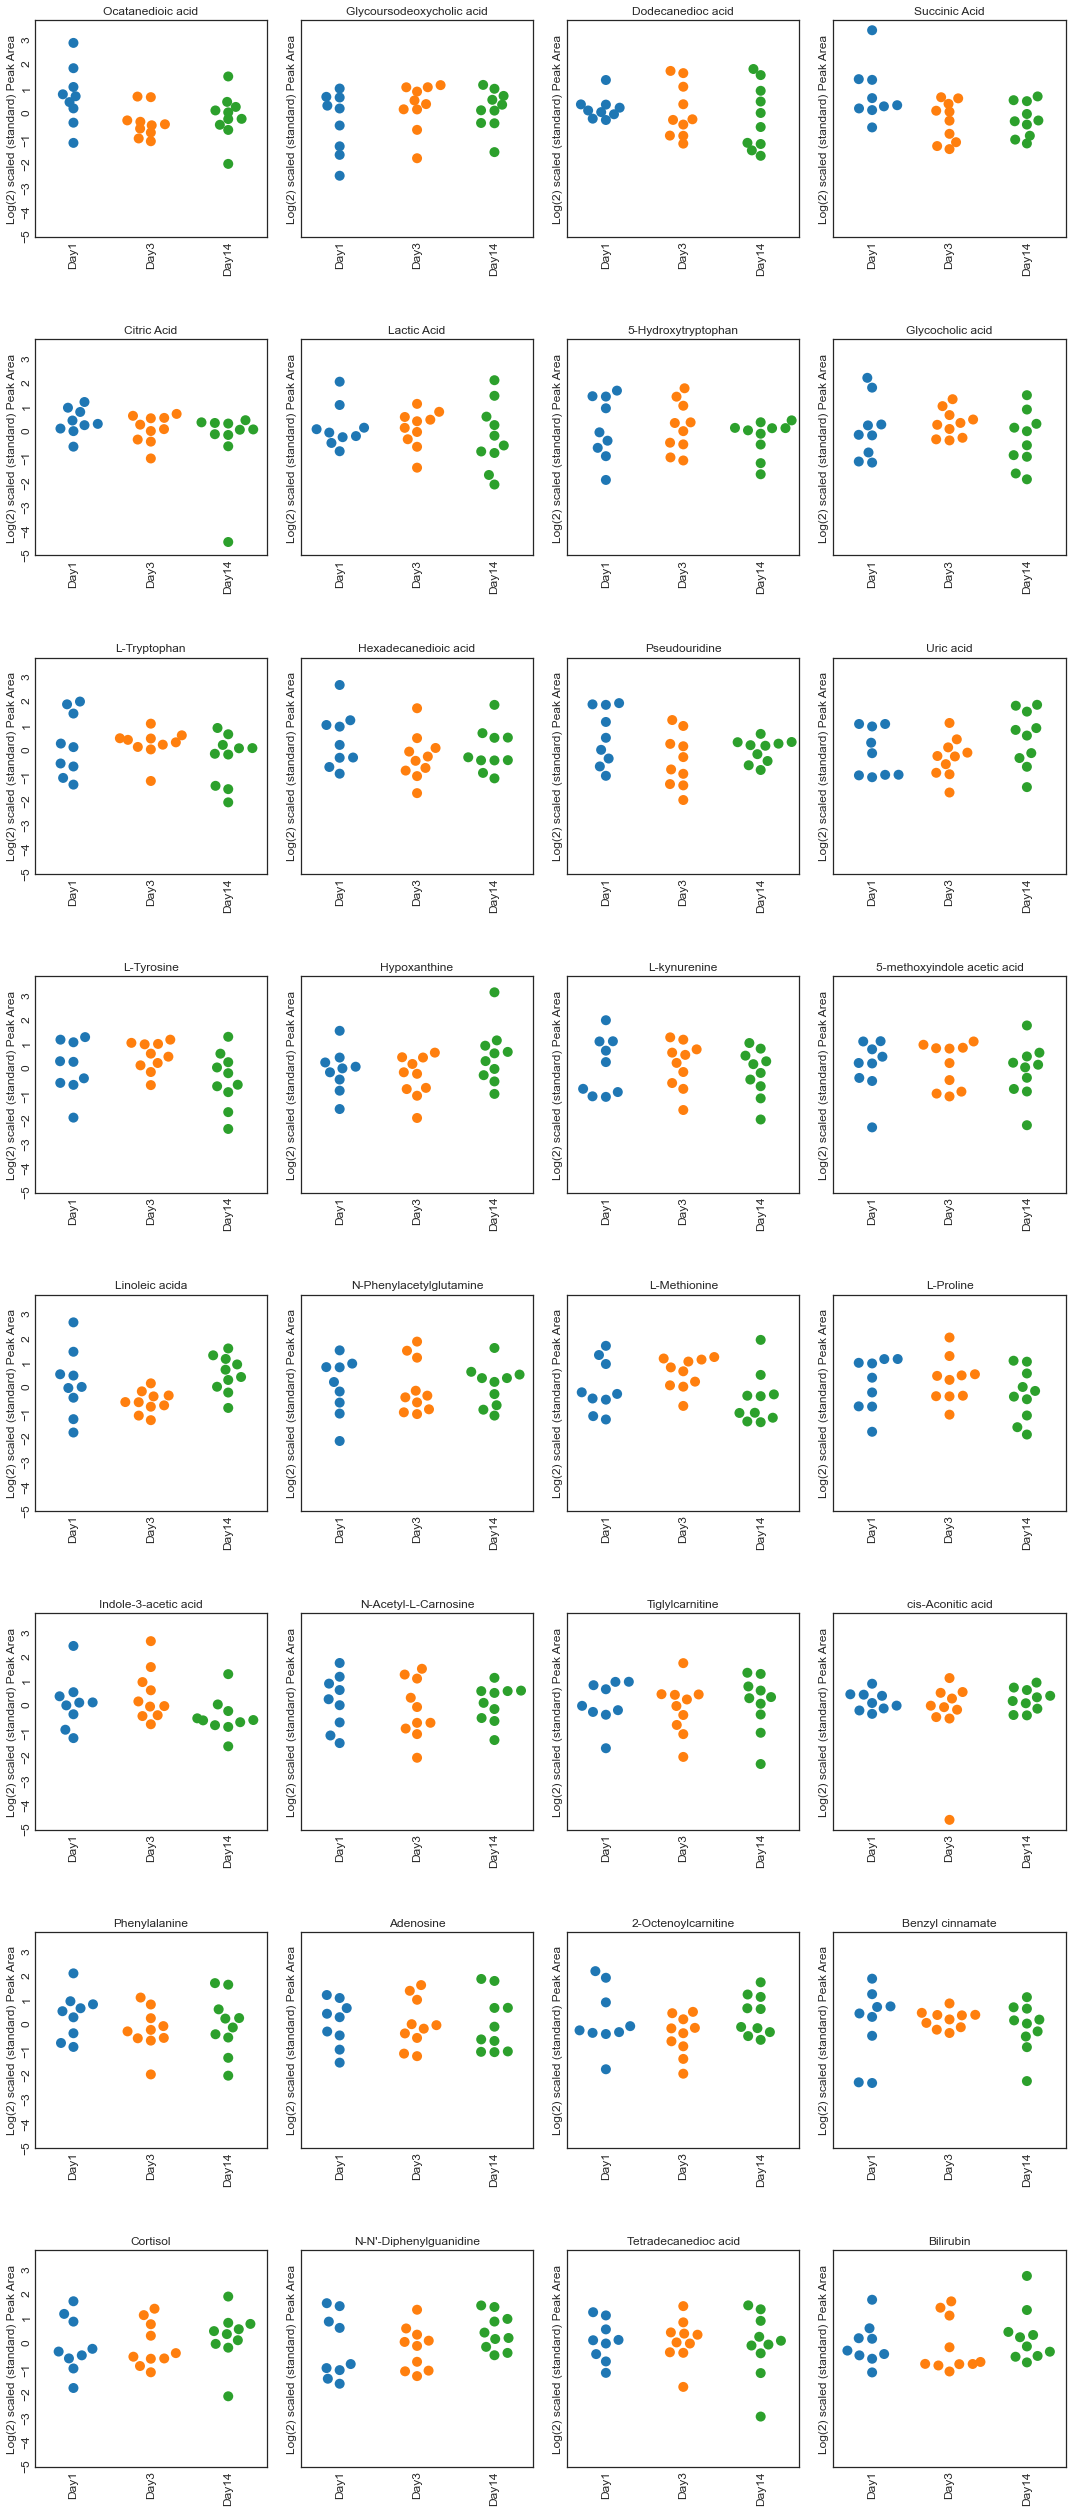

In [14]:
plotting_params['plot_type'] = 'swarm'

features.set_params(**plotting_params)
features.plot()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Violin-Swarm plot
</div>

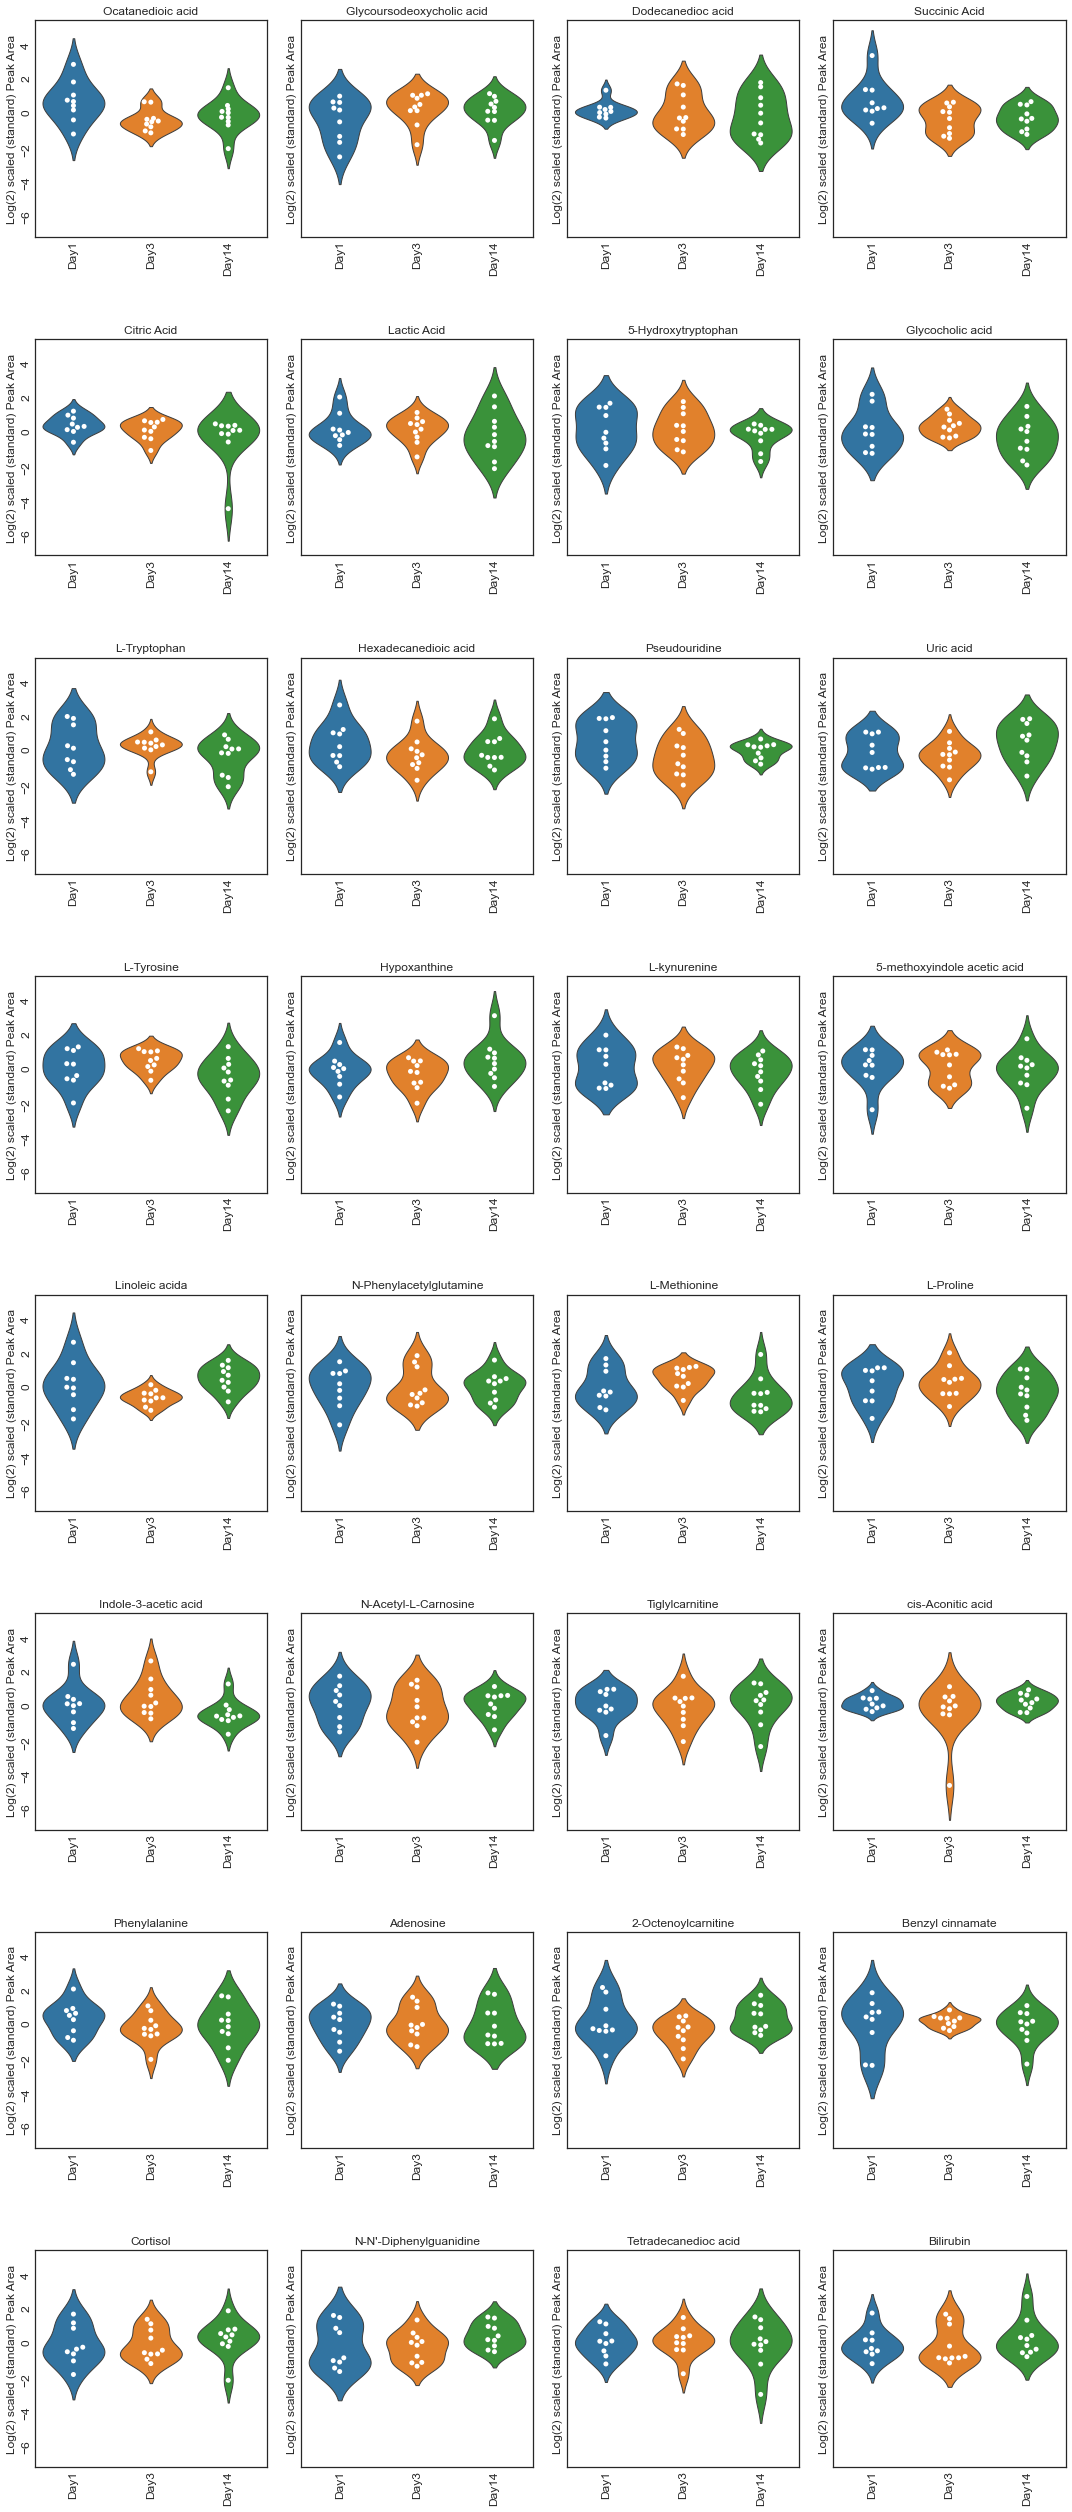

In [15]:
plotting_params['plot_type'] = 'violin-swarm'

features.set_params(**plotting_params)
features.plot()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Box-Swarm plot
</div>

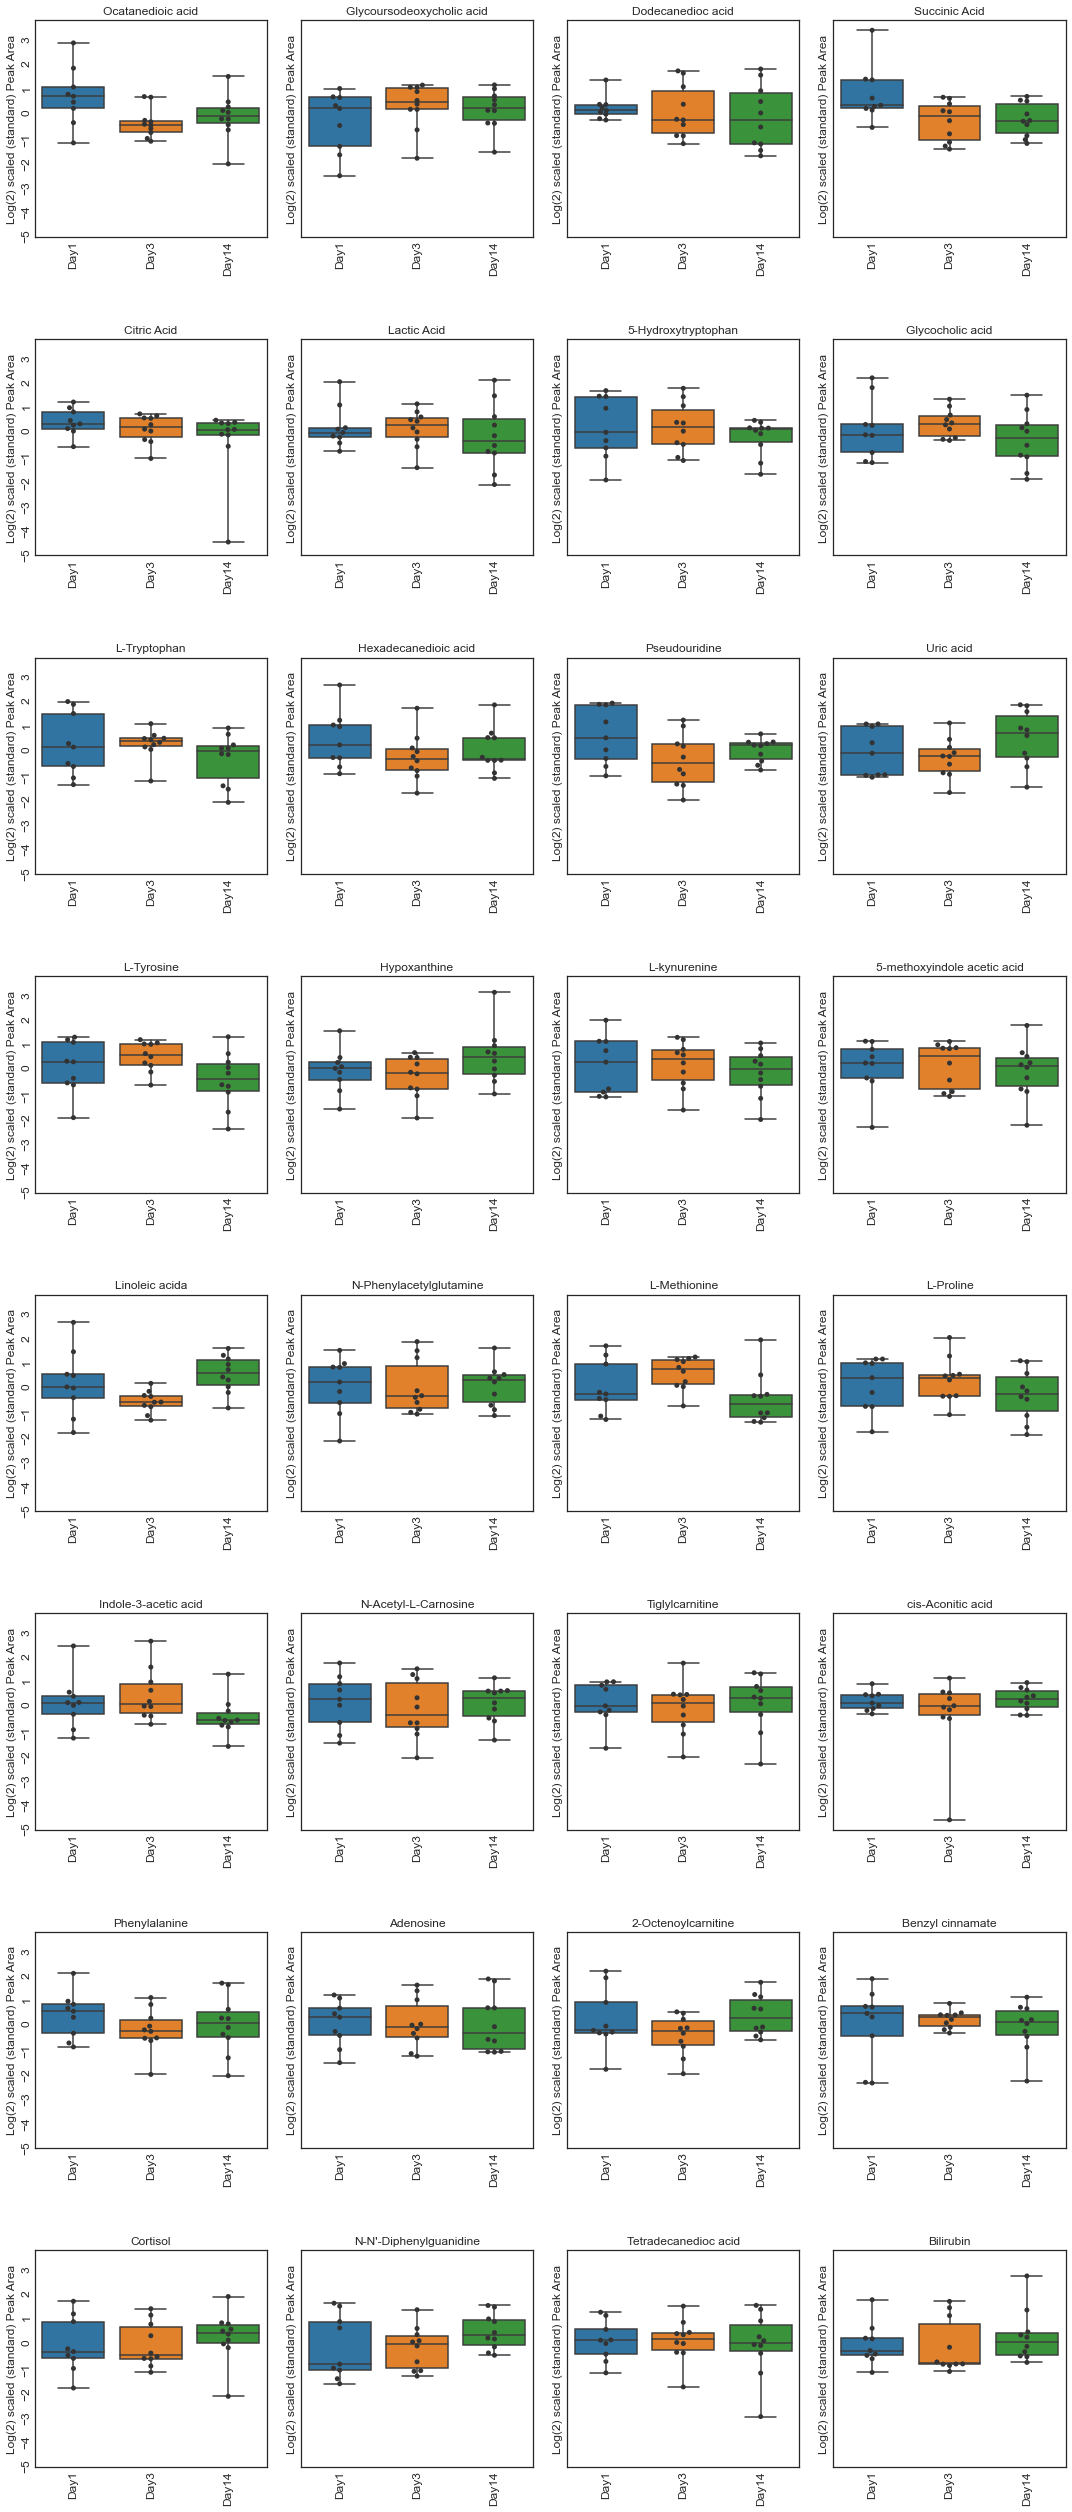

In [16]:
plotting_params['plot_type'] = 'box-swarm'

features.set_params(**plotting_params)
features.plot()